In [1]:
import h5py
import matplotlib.pyplot as plt
import glob
import pandas as pd
import seaborn as sns
import numpy as np
from scipy import stats
import gather

In [2]:
df = pd.read_csv("energies.csv")
df['basis']=pd.Categorical(df['basis'],['vdz','vtz','vqz'])

In [4]:
df.head()

,basis,bond length,method,energy,error,entropy
0,vdz,3.0,ROHF,-0.987290,0.0,0.0
1,vqz,3.0,ROHF,-0.989227,0.0,0.0
2,vtz,3.0,ROHF,-0.988908,0.0,0.0
3,vdz,4.0,ROHF,-0.906929,0.0,0.0
4,vqz,4.0,ROHF,-0.911363,0.0,0.0


Lets see how converged the energy for vmc is with input ROHF.

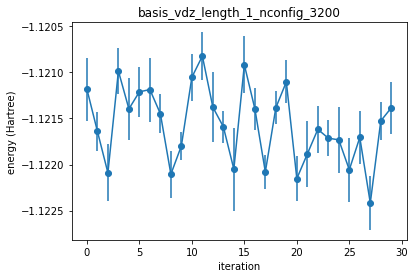

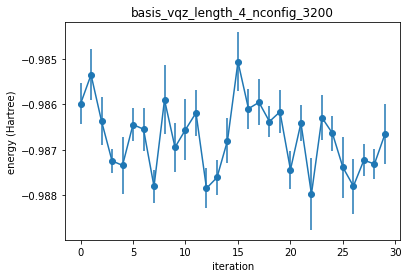

In [6]:
def plot_energy_series(basis,nconfig,length):
    with h5py.File(f"h2_{length}/hf/{basis}/opt_mf_0_{nconfig}.chk") as f:
        en=f['energy'][...]
        it=f['iteration'][...]
        err=f['energy_error'][...]
    plt.errorbar(it,en,err, marker='o')
    plt.title(f'basis_{basis}_length_{length}_nconfig_{nconfig}')
    plt.ylabel('energy (Hartree)')
    plt.xlabel('iteration')
    plt.show()
    #plt.savefig(f'pictures/optimize_sj_energy_series_startingwf_rohf_length_{length}_basis_{basis}_nconfig_{nconfig}.jpg')

plot_energy_series('vdz',3200,'1')
plot_energy_series('vqz',3200,'4')
    

Conclusion: The variations are within 0.001 Hartree for vdz_nconfig_3200_length_1.4. 0.002 H for vdz_nconfig_3200_length_1.4, and 0.005H for vqz,nconfig_3200_length_4.
Generally, higher bond length is higher error and higher basis size is higher error.

Now lets look at how energy changes with bond length. 


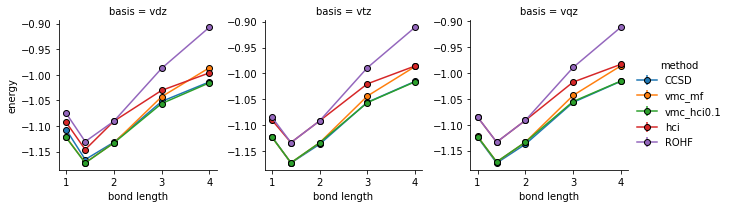

In [5]:
g = sns.FacetGrid(hue='method',col='basis', data=df.sort_values('bond length'),sharey=False)
g.map(plt.errorbar, 'bond length','energy','error', marker='o', mew=1, mec='k')
g.add_legend()
#plt.savefig('pictures/energy_vs_bond_length')

Conclusion: Energy is minimum at about 1.4(equilibrium length) and increases consistently on either side as expected. Also note that in general ROHF<HCI<VMC_mf<CCSD,vmc_hci. However at increasing length, HCI is becoming close to vmc_mf, and might take over. Try: running this all for lengths 5 and 6.

Lets look at how basis affects energy


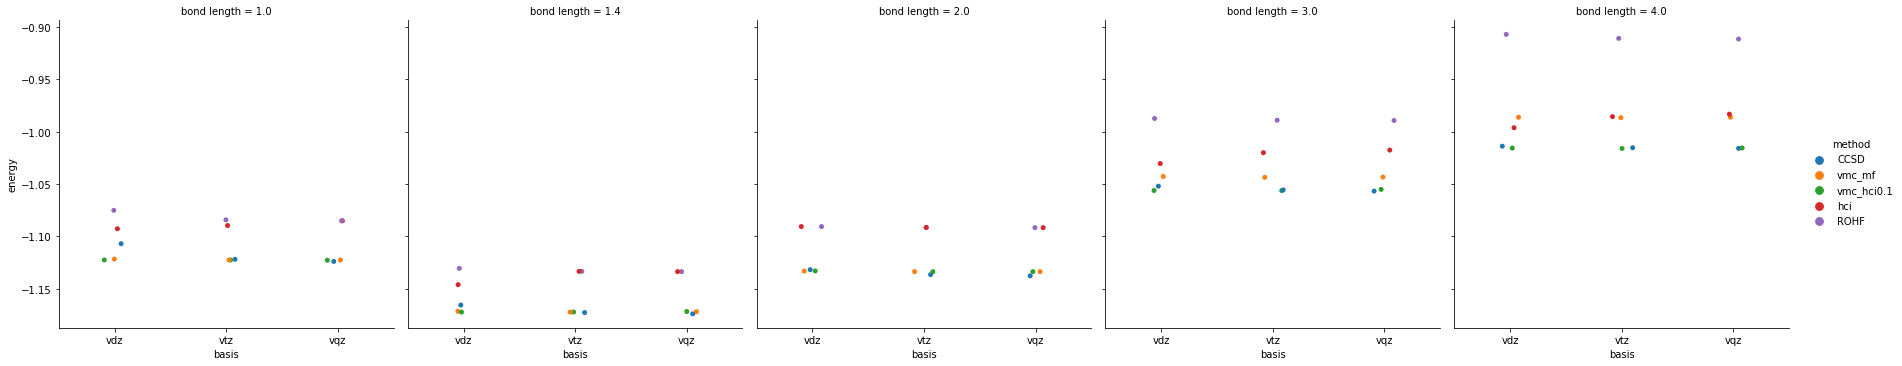

In [7]:
g = sns.catplot(x ='basis',y='energy',hue='method',col='bond length', data=df.sort_values('bond length'))


In [ ]:
Number of basis, barely affect energies. for length 1, ccsd benefits a lot by going from vdz to vtz



Lets look at the rdm1 from ccsd and vmc. Lets see if the diagonal sums to 1 as a normalized rdm1 should.

norm for vmc_rdm1 0.9995834324480989
vmc_ent 0.09746744863130036
rdm1 for vmc [[ 9.85574789e-01 -2.02992457e-03  1.69397046e-03  7.51005946e-04
   6.04608413e-04 -8.75568810e-04  2.33927470e-03  4.13105935e-05
  -1.89969080e-04  6.78460549e-04]
 [-1.83354831e-03  3.35240810e-03 -3.18489430e-04 -2.75490338e-03
  -3.30078162e-04 -2.52509346e-04 -1.51744777e-04 -1.67895122e-05
  -2.60223203e-04  7.17479072e-04]
 [ 1.02224852e-03  1.95318027e-04  1.58599401e-03 -8.59398361e-05
  -1.74733566e-04  1.55597031e-04  4.17570691e-04 -7.58577225e-05
  -3.04281600e-04 -2.96807976e-04]
 [ 9.22345603e-04 -2.93258572e-03  6.15720475e-05  2.73523092e-03
  -2.01266073e-04  1.69109716e-04 -1.27132733e-04 -1.64622416e-04
   8.64410978e-05 -4.32194722e-04]
 [ 1.83374068e-03 -1.54941884e-04 -2.08173249e-04  2.12857483e-05
   2.66684669e-03 -2.38151811e-04 -1.90099438e-04 -2.11892157e-04
   1.36225278e-04 -1.42449107e-04]
 [ 1.13426748e-03 -3.74144094e-05  1.34635675e-04  1.73699852e-04
   3.86881723e-05  3.

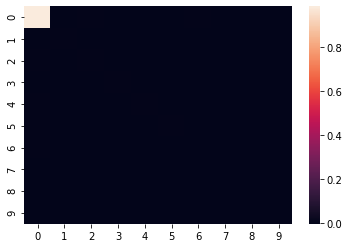

log of heatmap


<ipython-input-39-34f432dfe402>:10: RuntimeWarning: invalid value encountered in log
  sns.heatmap(np.log(rdm1))


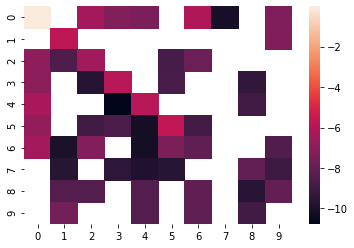

norm ccsd 0.9999999999999999
ccsd_ent 0.10442224636042315
ccsd rdm1 [[ 9.83232019e-01 -1.19074468e-15 -5.71713333e-03 -1.58472684e-15
  -3.51650744e-17 -2.58120413e-17  4.24737369e-03 -2.71899181e-17
   1.08133538e-17  1.16594829e-15]
 [-1.19074468e-15  5.67073118e-03 -1.05963677e-16 -4.93537276e-03
   8.98712882e-20  4.17876609e-18  1.08977663e-19  1.20603247e-18
  -4.68908952e-19  9.10823242e-04]
 [-5.71713333e-03 -1.05963677e-16  2.96823733e-03  9.65875767e-17
   7.78497130e-19 -2.03000112e-19  8.06990426e-04 -1.65635270e-18
   2.70027661e-18 -5.22306593e-17]
 [-1.58472684e-15 -4.93537276e-03  9.65875767e-17  4.39963701e-03
  -4.45315697e-19 -3.02163560e-18 -1.35993644e-17 -1.07039325e-18
   3.94156608e-19 -8.55935944e-04]
 [-3.51650744e-17  8.98712882e-20  7.78497130e-19 -4.45315697e-19
   1.50950174e-03  1.43728367e-19  3.84170532e-19 -1.31968417e-18
  -1.60498833e-18 -8.70244154e-20]
 [-2.58120413e-17  4.17876609e-18 -2.03000112e-19 -3.02163560e-18
   1.43728367e-19  1.50950174e-

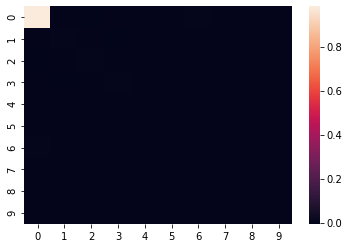

log of heat map


<ipython-input-39-34f432dfe402>:22: RuntimeWarning: invalid value encountered in log
  sns.heatmap(np.log(rdm1))


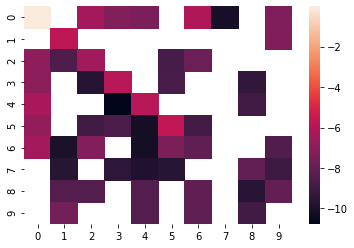

In [39]:
 
rdm1 = gather.read_vmc(f"h2_{length}/hf/{basis}/vmc_mf_0_{nconfig}.chk")[2]
norm = np.trace(rdm1)
vmc_ent = gather.calculate_entropy(rdm1)
print('norm for vmc_rdm1',norm)
print('vmc_ent',vmc_ent)
print('rdm1 for vmc',rdm1)
sns.heatmap(rdm1)
plt.show()
print('log of heatmap')
sns.heatmap(np.log(rdm1))
plt.show()

ccsd_rdm1 = gather.read_ccsd(f"h2_{length}/hf/{basis}/cc.chk")[1]
ccsd_norm = np.trace(ccsd_rdm1)
ccsd_ent = gather.calculate_entropy(ccsd_rdm1)
print('norm ccsd',ccsd_norm)
print('ccsd_ent',ccsd_ent)
print('ccsd rdm1',ccsd_rdm1)
sns.heatmap(ccsd_rdm1)
plt.show()
print('log of heat map')
sns.heatmap(np.log(rdm1))
plt.show()

It does sum to 1 within error of 0.001 for vmc. for ccsd it sums to 1.0.  

Now, to see if the entropy results make sense, lets see how the entropy changes with bond length


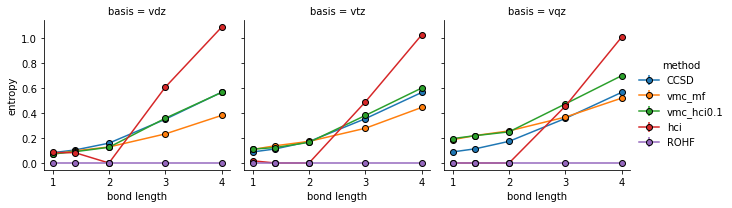

In [8]:
g = sns.FacetGrid(hue='method',col='basis', data=df.sort_values('bond length'))
g.map(plt.errorbar, 'bond length','entropy','error', marker='o', mew=1, mec='k')
g.add_legend()
#plt.savefig('Pictures/entropy_vs_bond_length')

both for ccsd and vmc, entropy increases with bond length. Note especially, that for both, the entropy decreases for bond_length =1 which is less than 1.4(equilibrium length)
The entropy of ccsd seems to be unchanged with basis, but for vmc it is clearly increasing significantly with basis. for vdz basis the hci entropy dips at bond length =2 for some reason. HCI entropy dramatically increases with basis.

Lets see the same thing but compare basis

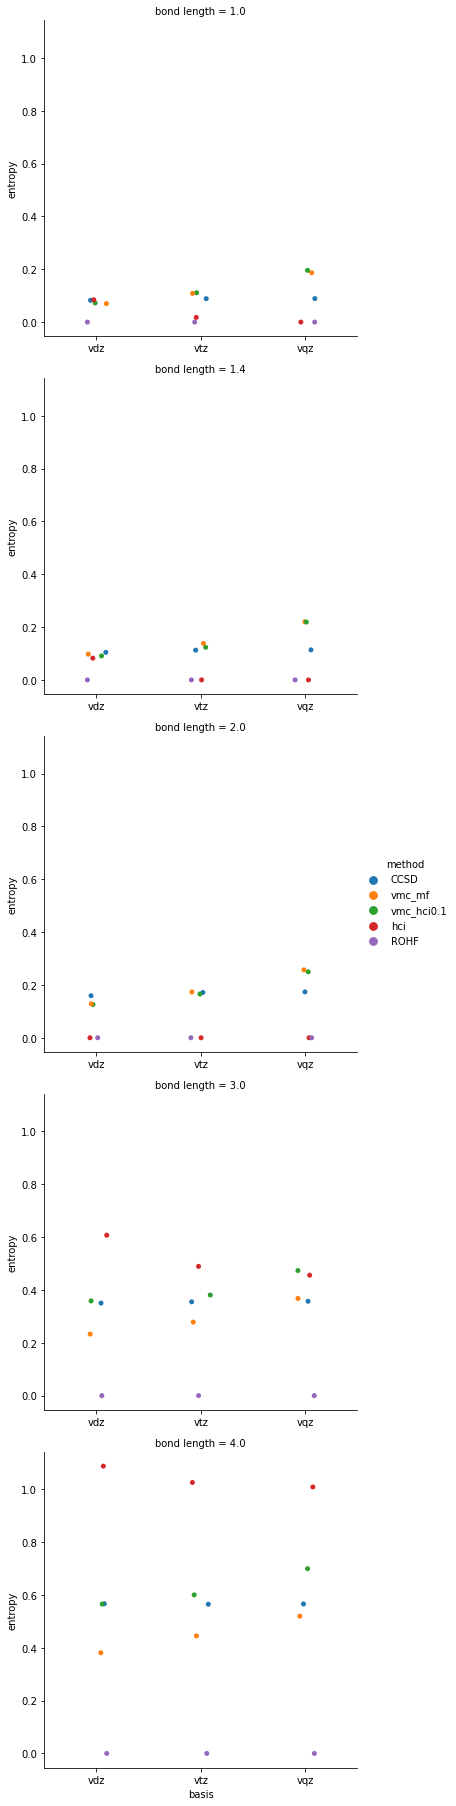

In [9]:
g = sns.catplot(x='basis',y='entropy',hue='method',row='bond length', data=df.sort_values('bond length'),sharex=False)

This solidifies that ccsd entropy doesnt change with basis. (perhaps because for helium, the double zeta basis gives the exact answer already)

The vmc shows consistent increase with higher zeta basis.HCI shows a decrease with basis size. Lets finally plot energy vs entropy

at higher bond lengths, the difference between vmc_hci and vmc_mf gets larger. vmc_hci is higher entropy.

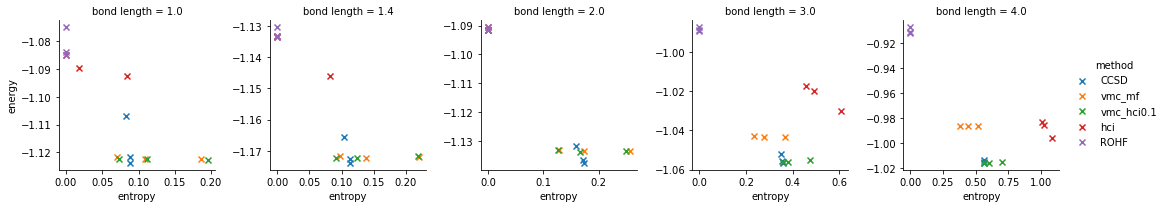

In [10]:
g = sns.FacetGrid(hue='method',col='bond length', data=df.sort_values('bond length'),sharey=False,sharex=False)
g.map(plt.scatter, 'entropy','energy',marker = 'x')
g.add_legend()
#plt.savefig('Pictures/energy_vs_entropy')

VMC_mf outcompetes hci to be near the ‘line of best entropy-energy tradeoff’.
vmc_hci is very similar to the exact solution and doesnt help much.

Trust the CCSD dots to be closest to exact solution as h2 just has 2 electrons. Curious to see how vmc performs when given a starting wf other than ROHF.

I ran vmc with starting wf given by hci with tol 0.1

here is just some (stray) code to help see the correlation lengths to account for vmc error. Not yet implemented. I used the autocorrelation function method since it seemed easy to automate, but perhaps i should have instead used the other method which looks at where the error converges as a function of correlation length, as i heard in hacktime that that method is more reliable.

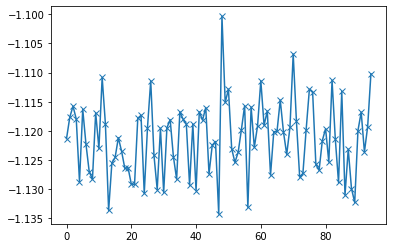

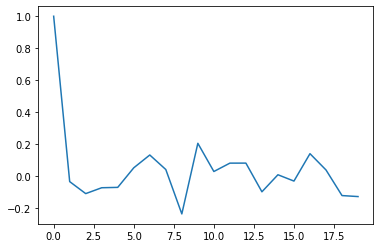

correlation_length 2
0.0009185163647305968 error
2.930060166900604
2.930060166900604 correlation_time


In [10]:
with h5py.File('system/h2/length_1/vmc_basis_ccpvdz_orbitalopt_True.chkfile','r') as f:
        warmup=5
        en = f['energytotal'][warmup:,...]
        nblocks=len(en)
        plt.plot(en,marker='x')
        plt.show()
        correlation_size = 20       
        correlation_array = np.zeros(correlation_size)
        for i in range(correlation_array.size):
            correlation_array[i] = gather.auto_correlation_k(en,i)
        plt.plot(np.arange(correlation_size),correlation_array)
        plt.show()
        correlation_length = np.where(correlation_array<=0)[0][0]+1
        print('correlation_length',correlation_length)
        print(np.std(en)/np.sqrt(en.size/correlation_length),'error')
        print(gather.find_correlation_time(en),'correlation_time')

In [35]:
def auto_correlation_k(data_array,k):
    correlation = 0
    norm = 0
    N=data_array.size
    mean = np.mean(data_array)
    for i in range(0,N-k):
       correlation+=(data_array[i]-mean)*(data_array[i+k]-mean)
       norm+=np.power((data_array[i]-mean),2)
    return correlation/norm

